In [31]:
# for data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for scaling and splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error
from sklearn.metrics import classification_report, confusion_matrix, r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('consolidated_data.csv')
print(df.columns.values)

['deviceIORate' 'cpu' 'memory' 'conns' 'arrivalRate' 'ioLoad' 'cpuLoad'
 'responseTime']


In [33]:
df.head()

,deviceIORate,cpu,memory,conns,arrivalRate,ioLoad,cpuLoad,responseTime
0,50,1,700,25,1,0,350,14.6
1,50,1,700,25,1,0,400,15.1
2,50,1,700,25,1,0,450,15.1
3,50,1,700,25,1,0,500,14.6
4,50,1,700,25,1,20,350,23.8


In [34]:
# preview the data
df.tail()

,deviceIORate,cpu,memory,conns,arrivalRate,ioLoad,cpuLoad,responseTime
12513,50,4,800,100,20,180,500,878958.3
12514,50,4,800,100,20,200,350,827122.4
12515,50,4,800,100,20,200,400,1105585.7
12516,50,4,800,100,20,200,450,539449.2
12517,50,4,800,100,20,200,500,477299.5


In [35]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
deviceIORate,12518.0,50.000000,0.000000,50.0,50.00,50.0,50.00,50.0
cpu,12518.0,2.687170,1.488336,1.0,1.00,4.0,4.00,4.0
memory,12518.0,745.869947,49.831125,700.0,700.00,700.0,800.00,800.0
conns,12518.0,58.655536,27.023705,25.0,25.00,50.0,75.00,100.0
arrivalRate,12518.0,10.177504,5.718124,1.0,5.00,10.0,15.00,20.0
ioLoad,12518.0,99.904138,63.248007,0.0,40.00,100.0,160.00,200.0
cpuLoad,12518.0,424.992012,55.903932,350.0,362.50,400.0,450.00,500.0
responseTime,12518.0,111764.966688,217321.774190,8.5,4240.85,29469.1,93288.25,2008239.3


In [36]:
df.drop(['deviceIORate'], axis=1, inplace=True)

In [37]:
# Features
X = df.drop('responseTime',axis=1)

# Label
y = df['responseTime']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8762, 6)
(3756, 6)
(8762,)
(3756,)


In [38]:
scaler = StandardScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test.reshape(-1,1))
y_train = scaler.fit_transform(y_train.reshape(-1,1))

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.7103968322501557
Min:  -1.5958063612771007


In [39]:
# k-fold CV (using all the 13 variables)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 7))}]

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6]}],
             return_train_score=True, scoring='r2', verbose=1)

In [40]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005851,0.000543,0.000371,0.000147,1,{'n_features_to_select': 1},0.264971,0.270628,0.261047,0.250871,...,0.263048,0.006860,6,0.262683,0.261373,0.263643,0.266161,0.261970,0.263166,0.001678
1,0.007405,0.002575,0.000318,0.000026,2,{'n_features_to_select': 2},0.447514,0.446684,0.444071,0.436377,...,0.441621,0.005665,5,0.440413,0.440638,0.441088,0.443126,0.443853,0.441824,0.001397
2,0.005918,0.000087,0.000343,0.000004,3,{'n_features_to_select': 3},0.458921,0.458014,0.455193,0.451420,...,0.455050,0.003104,2,0.454441,0.454667,0.455285,0.456264,0.456166,0.455365,0.000748
3,0.004754,0.000028,0.000344,0.000001,4,{'n_features_to_select': 4},0.459225,0.458399,0.455251,0.450836,...,0.455146,0.003334,1,0.454563,0.454765,0.455472,0.456575,0.456281,0.455531,0.000798
4,0.003416,0.000019,0.000348,0.000001,5,{'n_features_to_select': 5},0.459042,0.458299,0.455170,0.450771,...,0.455036,0.003310,4,0.454622,0.454810,0.455475,0.456603,0.456317,0.455565,0.000789
5,0.001971,0.000014,0.000350,0.000002,6,{'n_features_to_select': 6},0.458955,0.458331,0.455212,0.450832,...,0.455047,0.003278,3,0.454652,0.454816,0.455477,0.456609,0.456342,0.455579,0.000787


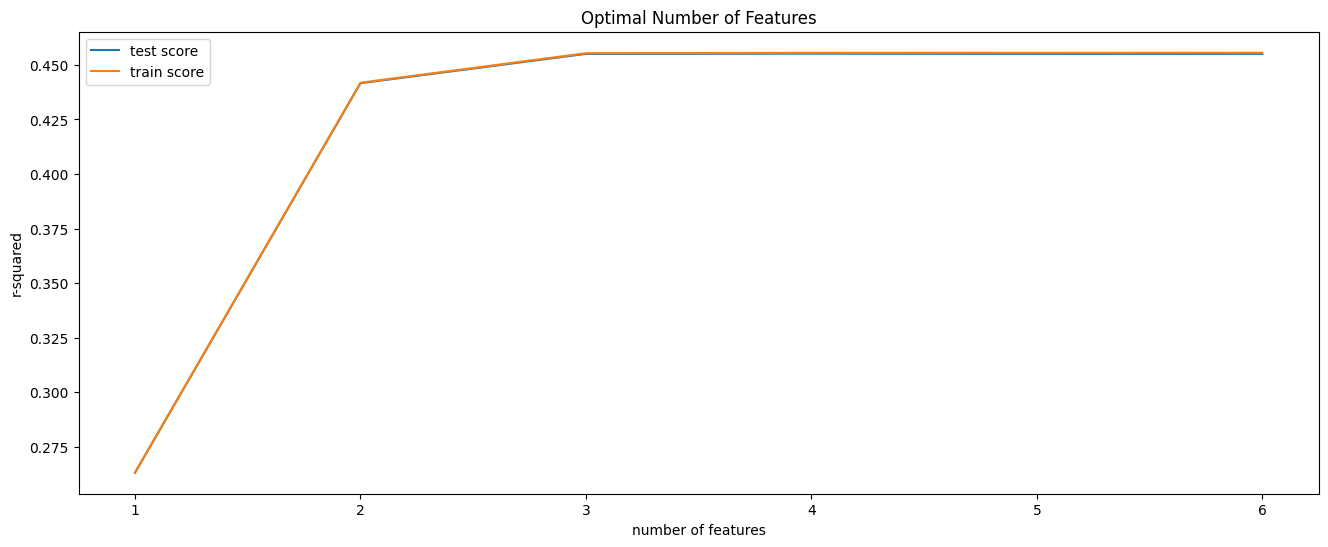

In [41]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [42]:
# final model
n_features_optimal = 4

model = LinearRegression()
model.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
print('MAPE: ',mean_absolute_percentage_error(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['responseTime'].describe())

MAE:  0.48690397362949717
MSE:  0.5430692730719386
RMSE:  0.7369323395481695
Variance Regression Score:  0.45693072692806136
MAPE:  2.088156828378272


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

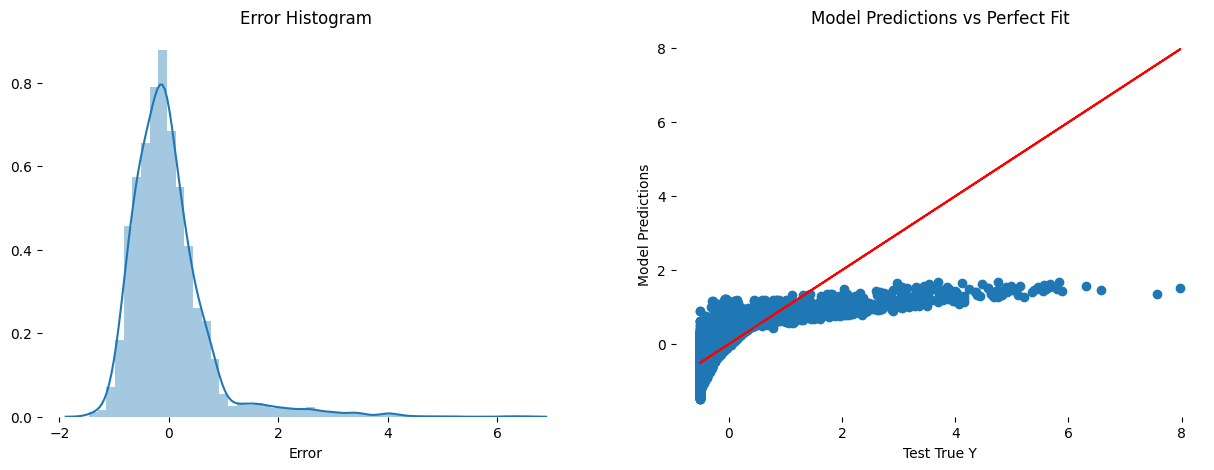

In [43]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.reshape(3756, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

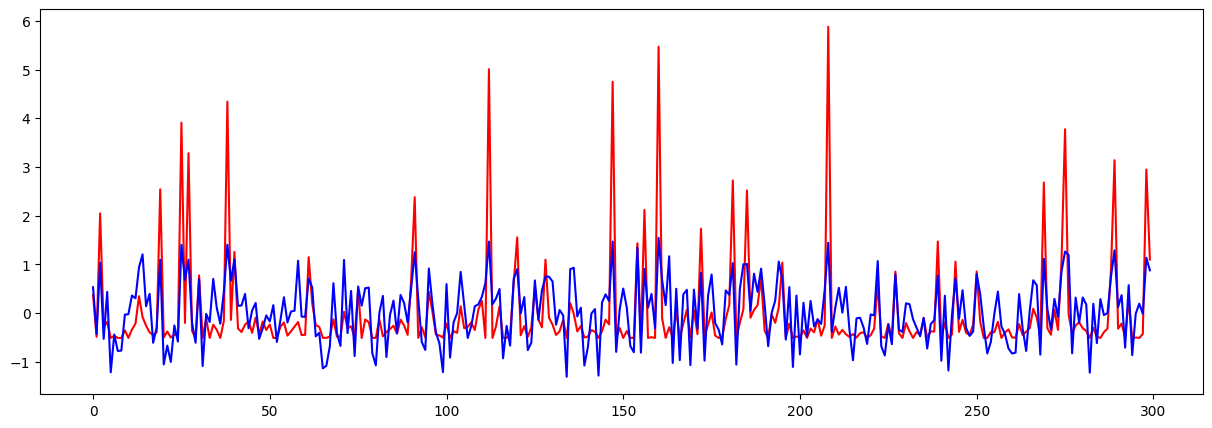

In [44]:
predictions.shape, y_test.shape
y_test = np.array(y_test).reshape(-1,1)
plt.figure(figsize=(15,5))
# sns.scatterplot(data=predictions,lw=1, color='red')
# sns.scatterplot(data=y_test,lw=1, color='blue')
# # # plt.xlabel('Epochs')
# # plt.ylabel('')
# # plt.title('Training Loss per Epoch')
# sns.despine()

plt.plot(y_test[:300,:], color = 'red')
plt.plot(predictions[:300], color = 'blue')
plt.show()

In [45]:
new_data = df.drop('responseTime',axis=1).iloc[80]
print(f'Features of new data:\n{new_data}')

# reshape the numpy array and scale the features
new_system = scaler.transform(new_data.values.reshape(-1, 6))

# run the model and get the price prediction
print('\nPredicted Response Time:',model.predict(new_system))

# original price
print('\nOriginal Response Time:',df.iloc[80]['responseTime'])

Features of new data:
cpu              1
memory         700
conns           25
arrivalRate      2
ioLoad         180
cpuLoad        350
Name: 80, dtype: int64


ValueError: X has 6 features, but StandardScaler is expecting 1 features as input.